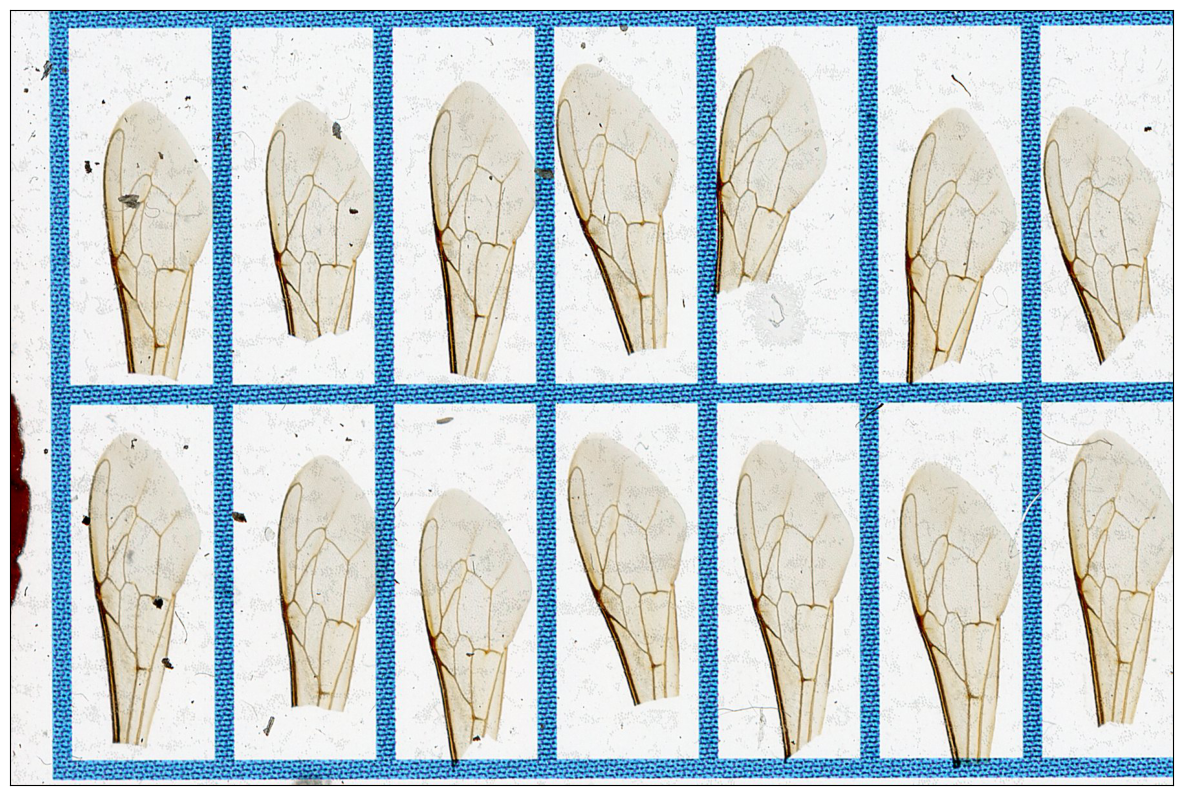

In [1]:
import os
import numpy as np
import skimage as sk
import skimage.io as skio
import cv2
import matplotlib.pyplot as plt
from time import time

nom_fichier = "2.jpg" # Avec l'extension

plt.figure(figsize=(15,15))
image = skio.imread('./photo_bleu/'+nom_fichier)
plt.imshow(image, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()


In [2]:
image.shape
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

([], [])

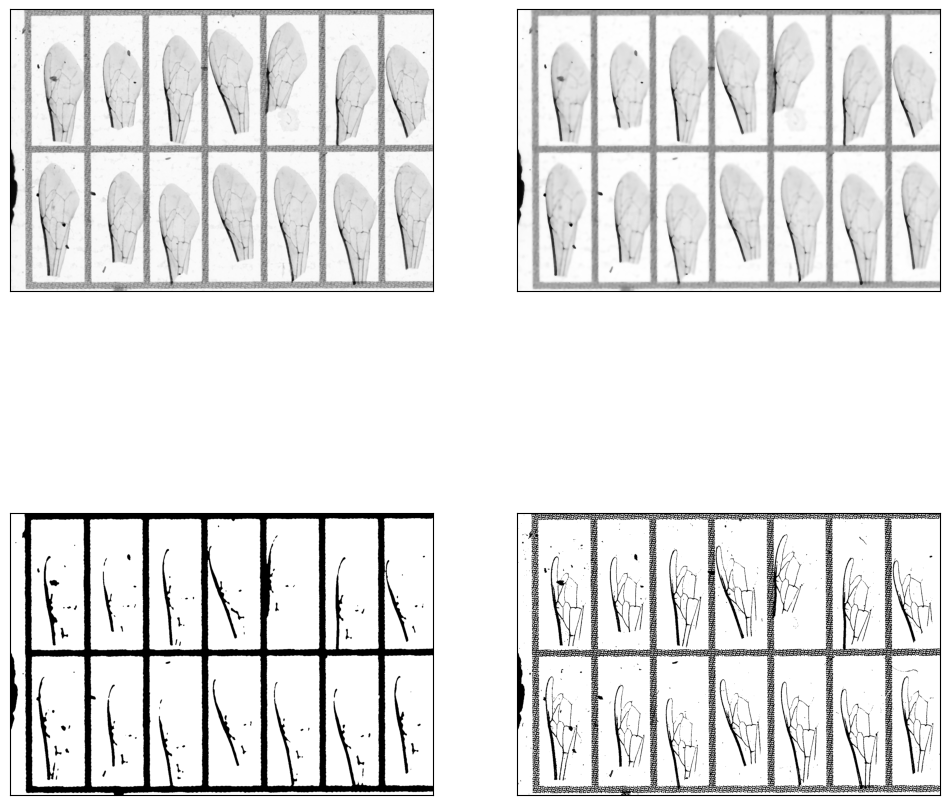

In [3]:
# To get the best result with the Threshold we first want to blurry the image to highlights the countours, otherwise,
# the threshold will consider too much areas
fig = plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
image = skio.imread('./photo_bleu/' + nom_fichier)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
med = cv2.medianBlur(image,7)
plt.imshow(med, cmap='gray')
plt.xticks([])
plt.yticks([])

haus = cv2.bilateralFilter(med, 15, 50, 50)
plt.subplot(2,2,2)
plt.imshow(haus, cmap='gray')
plt.xticks([])
plt.yticks([])

seu, th = cv2.threshold(haus,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(2,2,3)
plt.imshow(th, cmap='gray')
plt.xticks([])
plt.yticks([])

# Result without the threshold
seu_, th_ = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(2,2,4)
plt.imshow(th_, cmap='gray')
plt.xticks([])
plt.yticks([])

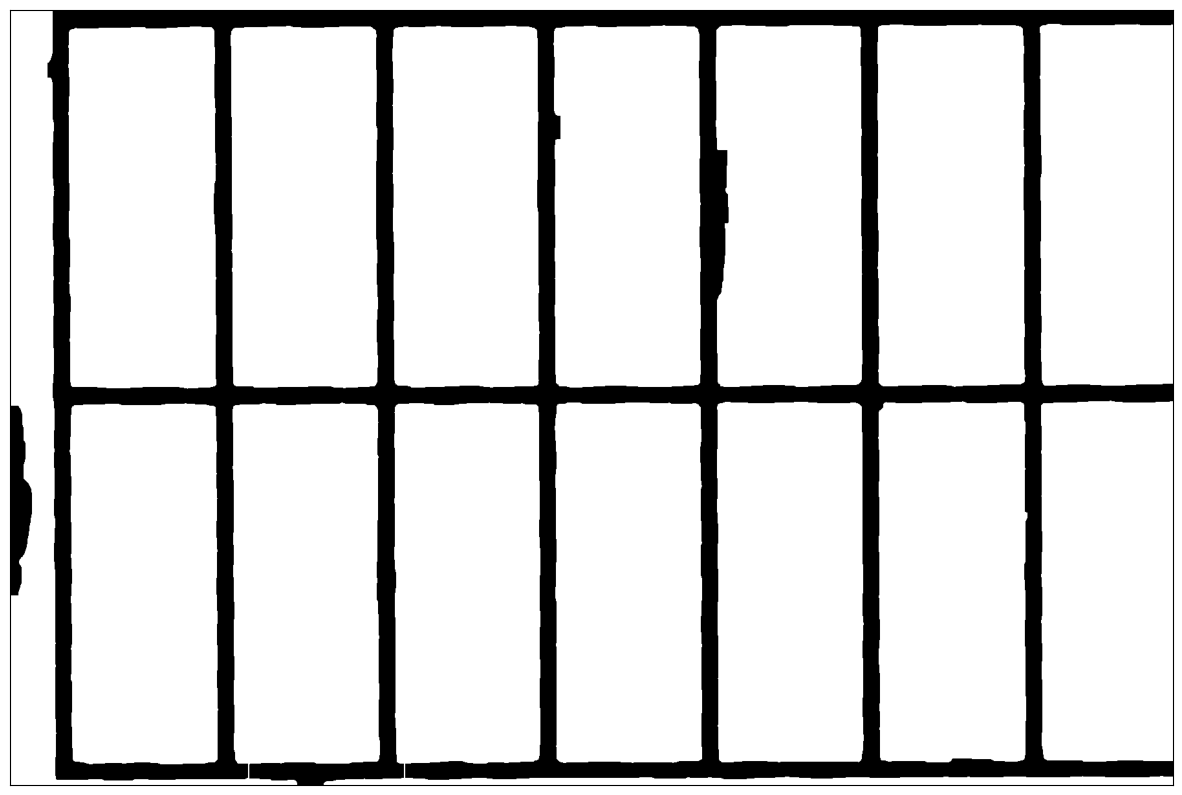

In [7]:
# Then we want to keep the rectangles only so we do morpholigcal operation : opening 
fig = plt.figure(figsize=(15,15))
th2 = th.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(22,20))
opening = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(22,22))
opening2 = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
plt.xticks([])
plt.yticks([])
plt.imshow(opening2, cmap='gray')

([], [])

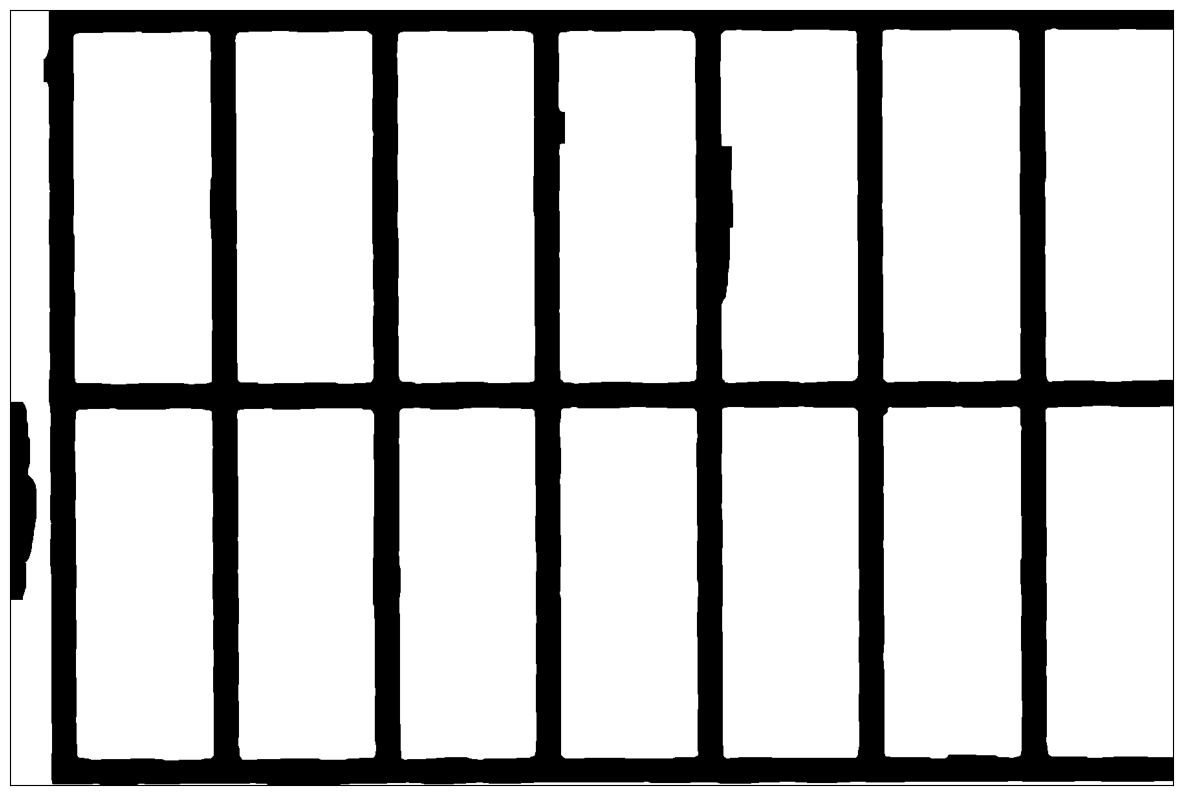

In [8]:
# To ensure that the rectangles are correctly detected we widen their countours
fig = plt.figure(figsize=(15,15))
final = opening2.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(14,14))
final2 = cv2.erode(final,kernel,iterations = 1)
plt.imshow(final2, cmap='gray')
plt.xticks([])
plt.yticks([])

24


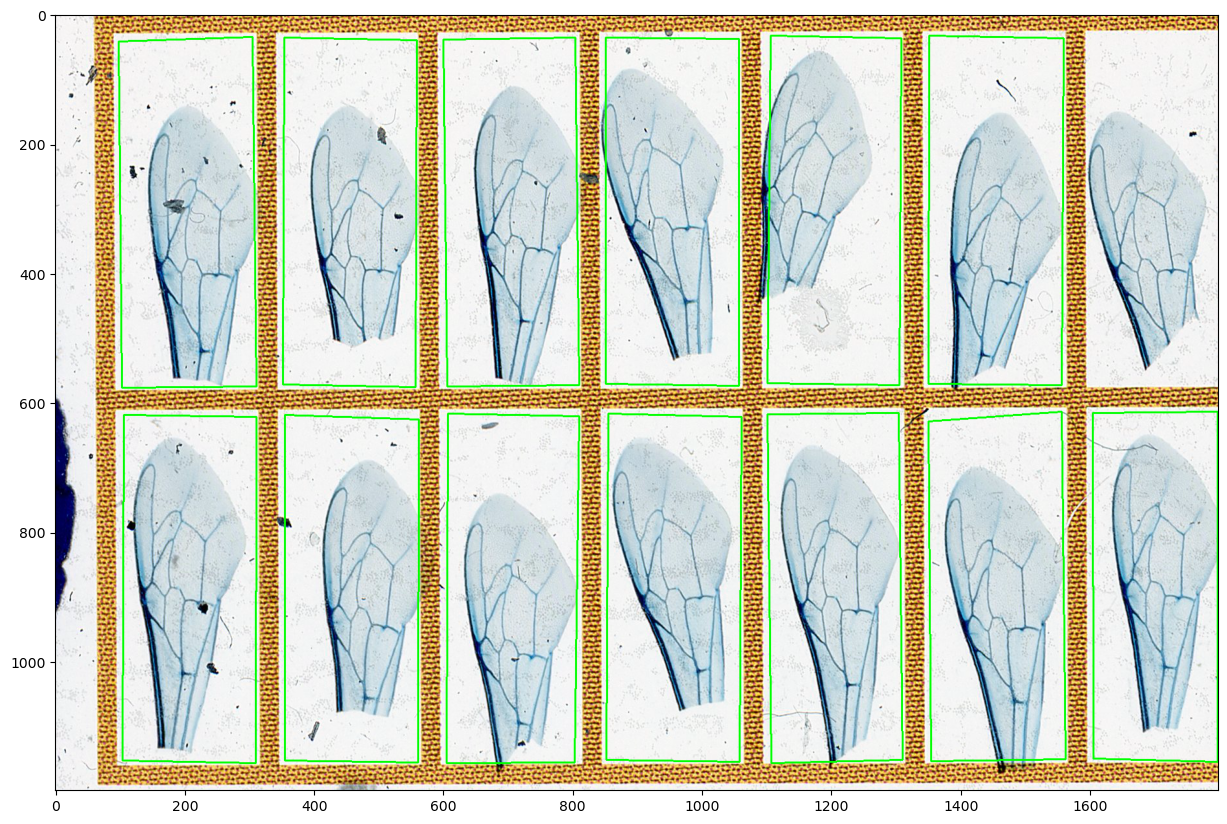

In [22]:
fig = plt.figure(figsize=(15,15))
cont1 = final2.copy()

image = skio.imread('./photo_bleu/' + nom_fichier)
# cnts = cv2.findContours(cont1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours =cv2.findContours(cont1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]

#Loop through my contours to find rectangles and put them in a list, so i can view them individually later.
cntrRect = []
idx = 10
for i in contours:
        epsilon = 0.05*cv2.arcLength(i,True) # Calculate the perimeter of the contour, second parameter is True 
        # because we want the countour to be closed
        # Then this perimeter is used to calculate the epsilon value for cv2.approxPolyDP() function with a 
        # precision factor for approximating the rectangle.
        approx = cv2.approxPolyDP(i,epsilon,True)
        if len(approx) == 4:
            cv2.drawContours(image,cntrRect,-1,(0,255,0),2)
            cntrRect.append(approx)
            x, y, w, h = cv2.boundingRect(i)
            if w > 400 :
                continue
            # print(w)
            roi = image[y:y + h, x:x + w]
            cv2.imwrite(str(idx) + '.png', roi)
            
            idx += 1
print('Number of rectangles detected'idx)

cv2.imwrite('test_im.png', image)
contours = skio.imread('./test_im.png')
plt.imshow(contours)